<a href="https://colab.research.google.com/github/Benjamin-Siebold/MSDS686-Deep-Learning/blob/main/Reuters_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters Assingment
## Adapted from Deep Learning with Python by Francois Chollet
#### Using the IMDB jupyter notebook as an example follow the prompts below to build a neural network to classify Reuters news wires into 46 different categories.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.datasets import reuters
import numpy as np
import pandas as pd
# We will set the seed
tf.random.set_seed(1234)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [ ]:
import operator
# Print the word index
wi = reuters.get_word_index()
sorted(wi.items(), key=operator.itemgetter(1))

[('the', 1),
 ('of', 2),
 ('to', 3),
 ('in', 4),
 ('said', 5),
 ('and', 6),
 ('a', 7),
 ('mln', 8),
 ('3', 9),
 ('for', 10),
 ('vs', 11),
 ('dlrs', 12),
 ('it', 13),
 ('reuter', 14),
 ('000', 15),
 ('1', 16),
 ('pct', 17),
 ('on', 18),
 ('from', 19),
 ('is', 20),
 ('that', 21),
 ('its', 22),
 ('cts', 23),
 ('by', 24),
 ('at', 25),
 ('year', 26),
 ('be', 27),
 ('with', 28),
 ('2', 29),
 ('will', 30),
 ('was', 31),
 ('billion', 32),
 ('he', 33),
 ('u', 34),
 ('s', 35),
 ('net', 36),
 ('has', 37),
 ('would', 38),
 ('an', 39),
 ('as', 40),
 ('5', 41),
 ('not', 42),
 ('loss', 43),
 ('4', 44),
 ('1986', 45),
 ('company', 46),
 ('which', 47),
 ('but', 48),
 ('this', 49),
 ('shr', 50),
 ('last', 51),
 ('are', 52),
 ('lt', 53),
 ('have', 54),
 ('or', 55),
 ('6', 56),
 ('bank', 57),
 ('7', 58),
 ('were', 59),
 ('8', 60),
 ('had', 61),
 ('oil', 62),
 ('trade', 63),
 ('share', 64),
 ('one', 65),
 ('about', 66),
 ('0', 67),
 ('inc', 68),
 ('9', 69),
 ('new', 70),
 ('profit', 71),
 ('also', 72),
 ('

In [ ]:
# Here is the same function we created for vectorizing the IMDB data.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
# Vectorize the train_data and test_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# Print the unique train labels (there should be 46)
# Print the shape of x_train
print(np.unique(train_labels))
print(x_train.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
(8982, 10000)


In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
# Keras has a built in function for catergoial encoding which we saw in the MNIST workbook
from keras.utils.np_utils import to_categorical

In [ ]:
# Vectorize the labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(8982, 46)


In [ ]:
# Import models and layers from Keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
# Build a sequential model network with 1 hidden layer. The input and hidden layer must have more hidden units than the number of classification categories.
# Things to think about, input and hidden layer activation, output activation for a multiclass problem, input shape, output units
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [ ]:
# Compile the model. Think about what optimizer, loss function, and metrics will you use.
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train your model on the training data for 20 epochs and 500 batch size and a validation split = 20%.
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 500,
                    verbose = 0,
                    validation_split = .2)

Epoch 1/20
15/15 [==============================] - 1s 94ms/step - loss: 2.9722 - accuracy: 0.4199 - val_loss: 2.0180 - val_accuracy: 0.5698
Epoch 2/20
15/15 [==============================] - 1s 68ms/step - loss: 1.6092 - accuracy: 0.6653 - val_loss: 1.4168 - val_accuracy: 0.7140
Epoch 3/20
15/15 [==============================] - 1s 69ms/step - loss: 1.1210 - accuracy: 0.7651 - val_loss: 1.1666 - val_accuracy: 0.7524
Epoch 4/20
15/15 [==============================] - 1s 69ms/step - loss: 0.8241 - accuracy: 0.8291 - val_loss: 1.0389 - val_accuracy: 0.7785
Epoch 5/20
15/15 [==============================] - 1s 70ms/step - loss: 0.6030 - accuracy: 0.8772 - val_loss: 0.9696 - val_accuracy: 0.7924
Epoch 6/20
15/15 [==============================] - 1s 69ms/step - loss: 0.4403 - accuracy: 0.9106 - val_loss: 0.9236 - val_accuracy: 0.7986
Epoch 7/20
15/15 [==============================] - 1s 70ms/step - loss: 0.3231 - accuracy: 0.9349 - val_loss: 0.9144 - val_accuracy: 0.8047
Epoch 8/20
15

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

        loss  accuracy  val_loss  val_accuracy
15  0.093207  0.964927  1.029830      0.803562
16  0.092781  0.964231  1.050338      0.799110
17  0.088793  0.966736  1.058689      0.791875
18  0.084848  0.964788  1.031141      0.804674
19  0.088403  0.968267  1.139468      0.786310


In [ ]:
# Let's plot the loss and accuracy vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

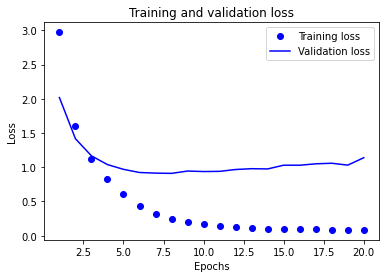

In [ ]:
# Use the IMDB example to plot the validataion and training loss vs epocs
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

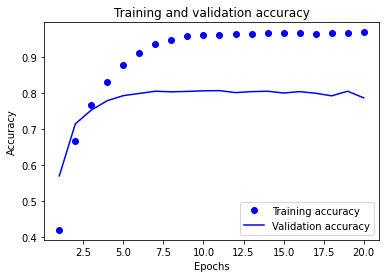

In [ ]:
# Use the IMDB example to plot the validataion and training accuracy vs epocs
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

71/71 [==============================] - 0s 4ms/step - loss: 1.2143 - accuracy: 0.7805
['loss', 'accuracy']
[1.2142618894577026, 0.7804986834526062]


In [ ]:
ans = model.predict(x_test)
np.rint(ans)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
ans.shape

(2246, 46)

In [ ]:
np.rint(ans[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
sum(y_test)

array([ 12., 105.,  20., 813., 474.,   5.,  14.,   3.,  38.,  25.,  30.,
        83.,  13.,  37.,   2.,   9.,  99.,  12.,  20., 133.,  70.,  27.,
         7.,  12.,  19.,  31.,   8.,   4.,  10.,   4.,  12.,  13.,  10.,
         5.,   7.,   6.,  11.,   2.,   3.,   5.,  10.,   8.,   3.,   6.,
         5.,   1.], dtype=float32)

In [ ]:
sum(np.rint(ans))

array([  7., 107.,  10., 812., 569.,   0.,  12.,   1.,  34.,  20.,  23.,
        90.,   5.,  31.,   0.,   2.,  83.,   1.,  11., 115.,  48.,  30.,
         0.,   4.,  11.,  15.,   2.,   1.,   4.,   3.,   4.,   5.,   7.,
         4.,   3.,   1.,   5.,   0.,   0.,   1.,   2.,   2.,   0.,   5.,
         4.,   1.], dtype=float32)

In [ ]:
total = sum(np.rint(ans))
sum(total)

2095.0

Above it can be seen that the classifier had an accuracy of 78%. What's especially interesting is the ability for articles to not get classified at all through the neural network. The last cell indicates of the 2246 articles, 151 did not receive any classification, or for every type of article, the probaility it was like that article was less than 50%. It would be interesting to go through these articles and see if there are any common themes around them. Below three more models are ran to compare to the original: one with an rmsprop optimizer, one with sigmoid activation, and one with more hidden layers of more nodes. It seems of all of these, the sigmoid may prove to be the best, because accuracy is the same, but our loss value decreases by quite a bit.

In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 150,
                    verbose = 0,
                    validation_split = .2)

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

71/71 [==============================] - 0s 4ms/step - loss: 1.7684 - accuracy: 0.7734
['loss', 'accuracy']
[1.7684110403060913, 0.7733749151229858]


In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(128, activation = 'sigmoid', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 150,
                    verbose = 0,
                    validation_split = .2)

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

71/71 [==============================] - 0s 4ms/step - loss: 0.9461 - accuracy: 0.7876
['loss', 'accuracy']
[0.9460626244544983, 0.7876224517822266]


In [ ]:
# Clear your session using this command: backend.clear_session() 
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 150,
                    verbose = 0,
                    validation_split = .2)

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

71/71 [==============================] - 1s 12ms/step - loss: 1.5703 - accuracy: 0.7858
['loss', 'accuracy']
[1.5703049898147583, 0.7858415246009827]
